IMPORT LIBRARIES AND LOAD DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("DataAnalyst.csv")    # importing csv file

df.head()   # preview first 5 rows

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


REMOVE DUPLICATES

In [2]:
df = df.drop_duplicates()

df.drop(['Competitors', 'Easy Apply'], axis=1, inplace=True)

CLEAN AND PREPARE DATA

In [3]:
def parse_salary(s):
    if pd.isnull(s):
        return None, None
    s = s.replace('$', '').replace('k', '').replace(',', '').strip().lower()
    numbers = re.findall(r'\d+', s)
    if len(numbers) >= 2:
        return int(numbers[0]), int(numbers[1])
    return None, None

df[['min_salary', 'max_salary']] = df['Salary Estimate'].apply(lambda x: pd.Series(parse_salary(str(x)))) 
df['avg_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)



EDA(Exploratory Data Analysis):
1Q. Total data analyst joba?

In [4]:
total_jobs = df.shape[0]      # total data analyst jobs
print(f"Total Data Analyst Jobs: {total_jobs}")

Total Data Analyst Jobs: 2253


2Q. How many unique job titles?

In [5]:
# total unique job titles 
print("Unique Job Titles:", df['Job Title'].nunique())    

Unique Job Titles: 1272


3Q. Most common job titles?

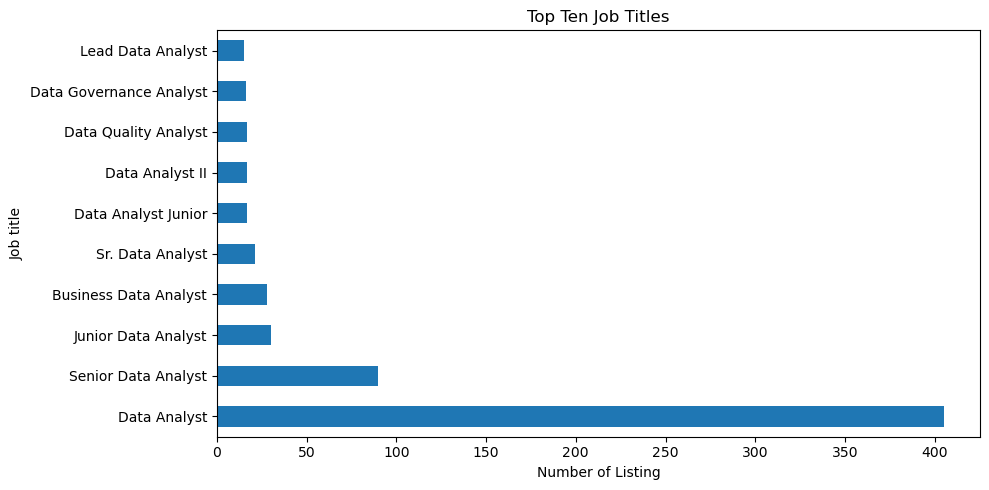

In [6]:
df['Job Title'].value_counts().head(10).plot(kind='barh', figsize=(10,5), title='Top Ten Job Titles')
plt.xlabel("Number of Listing")
plt.ylabel("Job title")
plt.tight_layout()
plt.show()

4Q. Companies hiring the most?

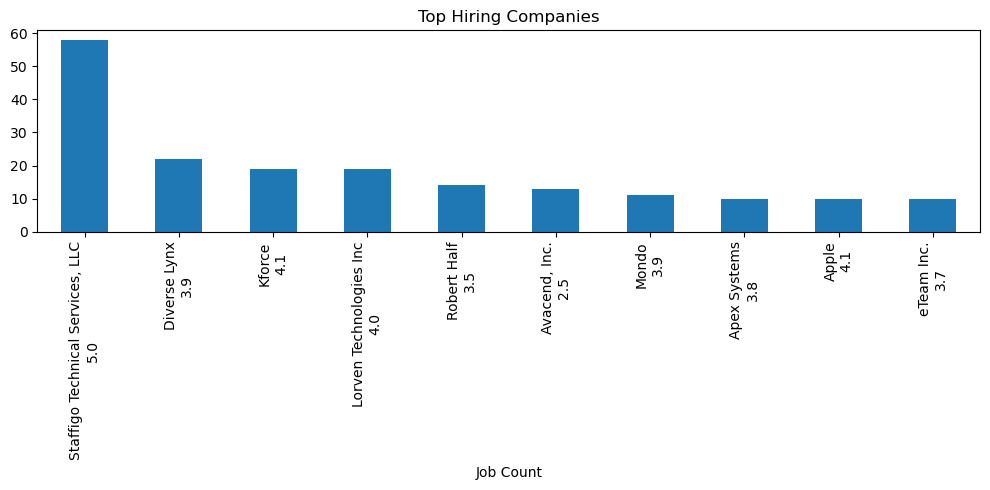

In [7]:
df['Company Name'].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top Hiring Companies')
plt.xlabel("Job Count")
plt.tight_layout()
plt.show()

5Q. Locations with most jobs?

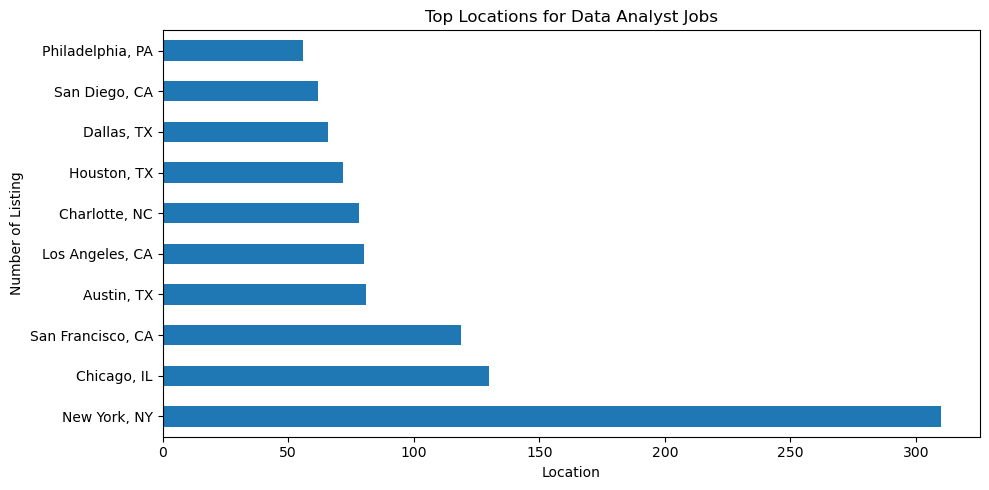

In [8]:
df['Location'].value_counts().head(10).plot(kind='barh', figsize=(10,5), title='Top Locations for Data Analyst Jobs')
plt.xlabel("Location")
plt.ylabel("Number of Listing")
plt.tight_layout()
plt.show()

6Q. Highest paying job titles(average salary)

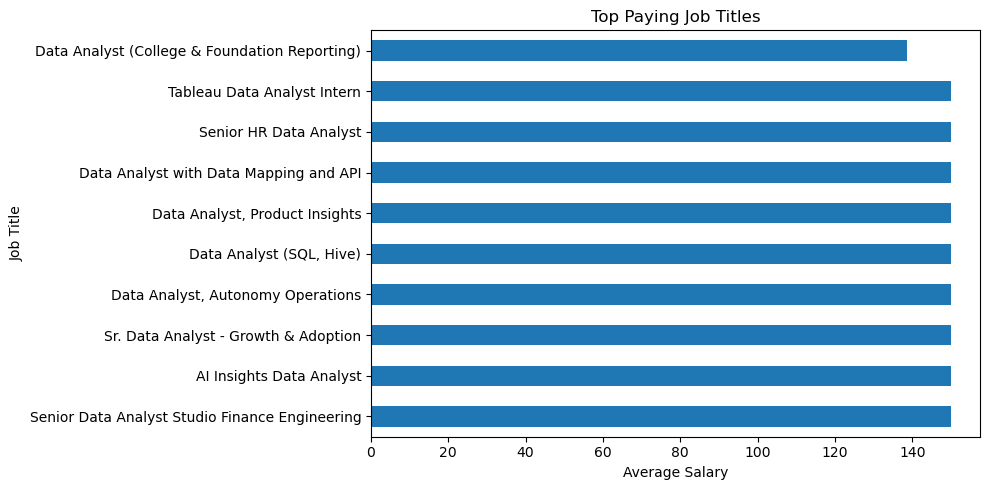

In [9]:
df.groupby('Job Title')['avg_salary'].mean().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5), title='Top Paying Job Titles')
plt.xlabel("Average Salary")
plt.tight_layout()
plt.show()

7Q. Industries hiring the most?

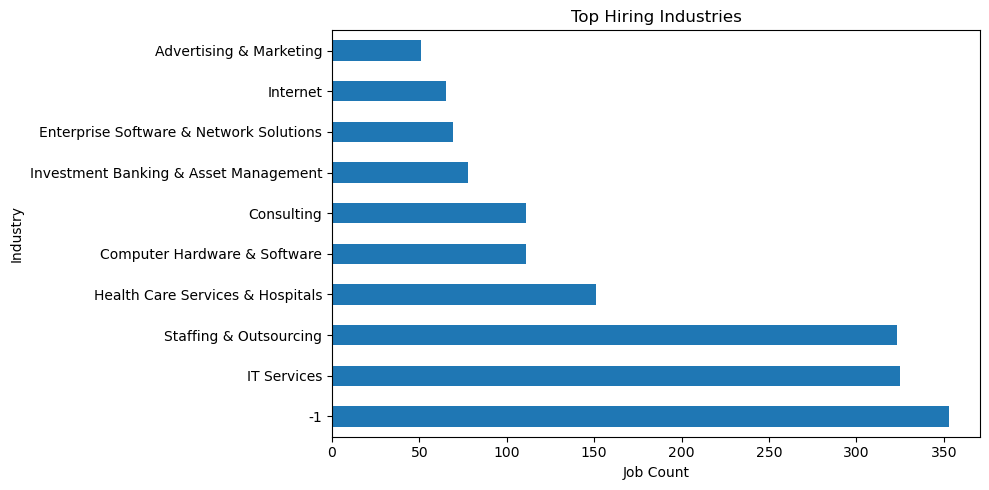

In [10]:
df['Industry'].value_counts().head(10).plot(kind='barh', figsize=(10,5), title='Top Hiring Industries')
plt.xlabel("Job Count")
plt.tight_layout()
plt.show()

8Q. Most common skills in job description?

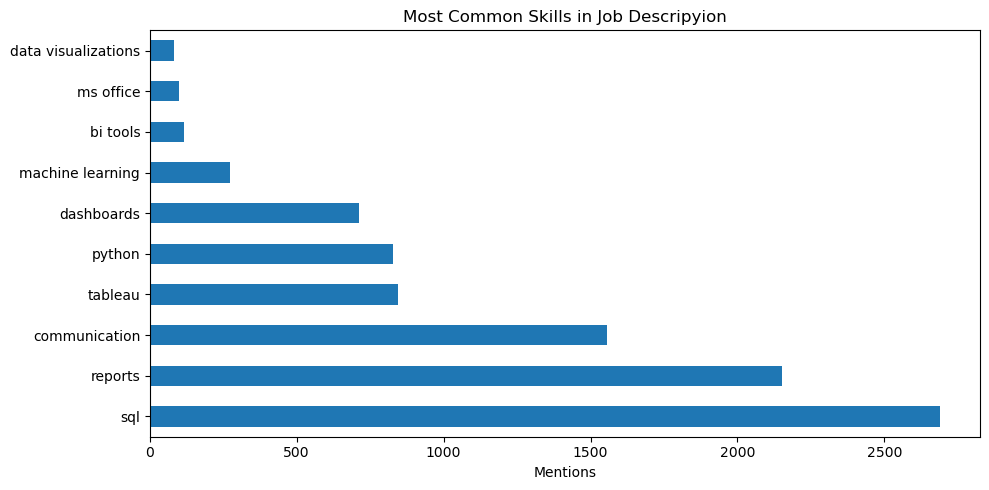

In [11]:
# step 1: combine all job description
all_desc = "".join(df['Job Description'].dropna().astype(str)).lower()

# step 2: count common keywords/skills
skills = ['dashboards', 'python', 'machine learning', 'tableau', 'reports', 'communication', 'sql', 'bi tools', 'ms office', 'data visualizations']

skill_counts = {skill: all_desc.count(skill) for skill in skills}
skill_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['Count']).sort_values(by='Count', ascending=False)

# step 3: visualize top skills
skill_df.plot(kind='barh', figsize=(10,5), legend=False, title='Most Common Skills in Job Descripyion')
plt.xlabel("Mentions")
plt.tight_layout()
plt.show()